# Importando bibliotecas

In [2]:
import zipfile #extrair o zip
from io import BytesIO #reconhecer numeros binarios e converter 
from PIL import Image 
import matplotlib.pyplot as plt #plotar graficos 
import os #SO do computador 
import shutil #para manipulação de arquivos e diretorios 
import pandas as pd 

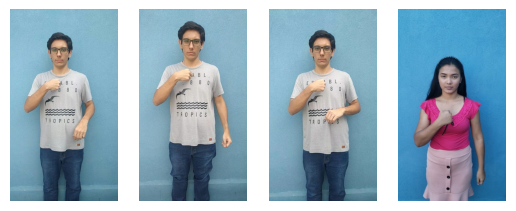

                                      Nomes dos Arquivos
0               30 FPS/30 FPS/test/I/I_1605967125.294393
1              30 FPS/30 FPS/test/I/I_1605967125.2944071
2               30 FPS/30 FPS/test/I/I_1605967125.294418
3              30 FPS/30 FPS/test/I/I_1605967125.2944283
4              30 FPS/30 FPS/test/I/I_1605967125.2944384
...                                                  ...
12993  validation/validation/your/your_1605967469.049...
12994  validation/validation/your/your_1605967469.049...
12995  validation/validation/your/your_1605967469.049...
12996  validation/validation/your/your_1605967469.049...
12997  validation/validation/your/your_1605967469.049...

[12998 rows x 1 columns]


In [3]:
def extrair_e_exibir_imagens(caminho_arquivo_zip, num_imagens_a_exibir=4):
    # criação de um diretório temporario
    dir_temporario_extracao = "temp_imagens_extraidas"

    os.makedirs(dir_temporario_extracao, exist_ok=True)

    try:
        # extração do zip
        with zipfile.ZipFile(caminho_arquivo_zip, "r") as zip_ref:
            # Listar todos os arquivos extraídos
            arquivos_extraidos = zip_ref.namelist()

            # exibir as primeiras fotos do diretorio
            for i, nome_arquivo in enumerate(arquivos_extraidos[:num_imagens_a_exibir]):
                caminho_arquivo = os.path.join(dir_temporario_extracao, nome_arquivo)

                zip_ref.extract(nome_arquivo, dir_temporario_extracao)

                # ler e mostrar a imagem
                with Image.open(caminho_arquivo) as img:
                    plt.subplot(1, num_imagens_a_exibir, i + 1)
                    plt.imshow(img)
                    plt.axis("off")

            plt.show()

    except Exception as e:
        print(f"Falha ao processar o arquivo zip: {str(e)}")

    finally:
        # remove o diretorio temporario
        shutil.rmtree(dir_temporario_extracao, ignore_errors=True)


# Caminho para o arquivo zipado
# caminho_arquivo_zip = "C:/Users/fllsa/Music/redes/ReconhecimentoDeSinais/archive.zip"
caminho_arquivo_zip = r"C:\Users\libhi\projetoSinais\ReconhecimentoDeSinais\dataset_SignLanguage.zip"

# Número de imagens para exibir
num_imagens_a_exibir = 4

extrair_e_exibir_imagens(caminho_arquivo_zip, num_imagens_a_exibir)

# Adicionando as labels 

# Lista para armazenar os nomes dos arquivos
nomes_arquivos_zip = ['Bank', 'Bus', 'Car', 'Formation', 'Hospital', 'I', 'Man', 'Motorcycle', 'My', 'Supermarket', 'We', 'Woman', 'You', 'You (plural)', 'Your']

# Extrair os nomes dos arquivos no zip
with zipfile.ZipFile(caminho_arquivo_zip, 'r') as zip_ref:
    nomes_arquivos_zip = zip_ref.namelist()


# Criar um DataFrame pandas com os nomes dos arquivos
df_nomes_arquivos = pd.DataFrame({"Nomes dos Arquivos": nomes_arquivos_zip})

# Exibir o DataFrame
print(df_nomes_arquivos)


In [4]:
# exibir os nomes
df_nomes_arquivos.head()

,Nomes dos Arquivos
0,30 FPS/30 FPS/test/I/I_1605967125.294393
1,30 FPS/30 FPS/test/I/I_1605967125.2944071
2,30 FPS/30 FPS/test/I/I_1605967125.294418
3,30 FPS/30 FPS/test/I/I_1605967125.2944283
4,30 FPS/30 FPS/test/I/I_1605967125.2944384


In [11]:
# Renomeando os dados 

# def renomear_pastas(caminho_arquivo_zip, labels):
#     # Percorrer todas as pastas no caminho_raiz
#     for pasta_atual, subpastas, arquivos in os.walk(caminho_arquivo_zip):
#         # Para cada subpasta
#         for subpasta in subpastas:
#             # Se a subpasta tiver um índice válido na lista de labels
#             if labels:
#                 nova_label = labels.pop(0)
#                 # Construir o novo caminho da subpasta
#                 novo_caminho = os.path.join(pasta_atual, nova_label)
#                 # Renomear a subpasta
#                 os.rename(os.path.join(pasta_atual, subpasta), novo_caminho)
#                 print(f"Renomeada: {os.path.relpath(novo_caminho, caminho_arquivo_zip)}")
#             else:
#                 print("Faltam labels para todas as subpastas.")

# # Exemplo de uso
# caminho_arquivo_zip = r"C:\Users\libhi\projetoSinais\ReconhecimentoDeSinais\dataset_SignLanguage.zip"
# labels = ["Bank", "Bus", "Car", "Formation", "Hospital", "I", "Man", "Motorcycle", "My", "Supermarket", "We", "Woman", "You", "You (plural)", "Your"]

# renomear_pastas(caminho_arquivo_zip, labels)